# The impact of large-scale forcing scales on clouds.


In [1]:
# Import packages

from datetime import datetime
import numpy as np
import xarray as xr
import xwrf

import matplotlib.pyplot as plt

In [2]:

# The Large Scale Forcing Scale in Simulation 6 is 75 km
# The Large Scale Forcing Scale in Simulation 7 is 150 km
# The Large Scale Forcing Scale in Simulation 8 is 300 km

In [3]:
# Load Data
# To recap, wrfstat is 10 minutes-average values, wrfout is a snapshot at a given time.

path_shcu_root = "/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/ShCu/untar"  # on Jupyter

case_date = datetime(2019, 4, 4)

sim_id2 = 6
sim_id3 = 7
sim_id4 = 8

ds_stat6 =  xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id2:04d}/raw_model/wrfstat_d01_{case_date:%Y-%m-%d_12:00:00}.nc")
ds_stat7 =  xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id3:04d}/raw_model/wrfstat_d01_{case_date:%Y-%m-%d_12:00:00}.nc")
ds_stat8 =  xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id4:04d}/raw_model/wrfstat_d01_{case_date:%Y-%m-%d_12:00:00}.nc")

ds_stat6 = ds_stat6.xwrf.postprocess()
ds_stat7 = ds_stat7.xwrf.postprocess()
ds_stat8 = ds_stat8.xwrf.postprocess()

ds_stat7

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 72GB
Dimensions:         (Time: 91, z: 226, z_stag: 227, y: 250, x: 250,
                     x_stag: 251, y_stag: 251)
Coordinates:
    XTIME           (Time) datetime64[ns] 728B ...
  * Time            (Time) datetime64[ns] 728B 2019-04-04T12:00:00 ... 2019-0...
  * y_stag          (y_stag) float64 2kB -1.25e+04 -1.24e+04 ... 1.25e+04
  * y               (y) float64 2kB -1.245e+04 -1.235e+04 ... 1.245e+04
  * x_stag          (x_stag) float64 2kB -1.25e+04 -1.24e+04 ... 1.25e+04
  * x               (x) float64 2kB -1.245e+04 -1.235e+04 ... 1.245e+04
Dimensions without coordinates: z, z_stag
Data variables: (12/179)
    Times           (Time) |S19 2kB b'2019-04-04_12:00:00' ... b'2019-04-05_0...
    CST_CLDLOW      (Time) float32 364B ...
    CST_CLDTOT      (Time) float32 364B ...
    CST_LWP         (Time) float32 364B ...
    CST_IWP         (Time) float32 364B ...
    CST_PRECW       (Time) float32 364B ...
    ...              ...
    CSV_IWC         (Time, z, y, x) float32 5GB ...
    CSV_CLDFRAC     (Time, z, y, x) float32 5GB ...
    CSS_LWP         (Time, y, x) float32 23MB ...
    CSS_IWP         (Time, y, x) float32 23MB ...
    CSS_CLDTOT      (Time, y, x) float32 23MB ...
    CSS_CLDLOW      (Time, y, x) float32 23MB ...
Attributes: (12/96)
    TITLE:                                  OUTPUT FROM WRF V3.8.1 MODEL
    START_DATE:                            2019-04-04_12:00:00
    WEST-EAST_GRID_DIMENSION:              251
    SOUTH-NORTH_GRID_DIMENSION:            251
    BOTTOM-TOP_GRID_DIMENSION:             227
    DX:                                    100.0
    ...                                    ...
    config_aerosol:                        NA
    config_forecast_time:                  15.0 h
    config_boundary_method:                Periodic
    config_microphysics:                   Thompson (mp_physics=8)
    config_nickname:                       runlas20190404v1msda2d150km
    simulation_origin_host:                cumulus-login2.ccs.ornl.gov

# Compare cloud core fraction with the observation (COG)


In [4]:

sim_id2 = 6
ds_cogs6 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id2:04d}/obs_model/sgplassocogsdiagobsmod{sim_id2}C1.m1.{case_date:%Y%m%d}.120000.nc")

sim_id3 = 7
ds_cogs7 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id3:04d}/obs_model/sgplassocogsdiagobsmod{sim_id3}C1.m1.{case_date:%Y%m%d}.120000.nc")

sim_id4 = 8
ds_cogs8 = xr.open_dataset(f"{path_shcu_root}/{case_date:%Y%m%d}/sim{sim_id4:04d}/obs_model/sgplassocogsdiagobsmod{sim_id4}C1.m1.{case_date:%Y%m%d}.120000.nc")


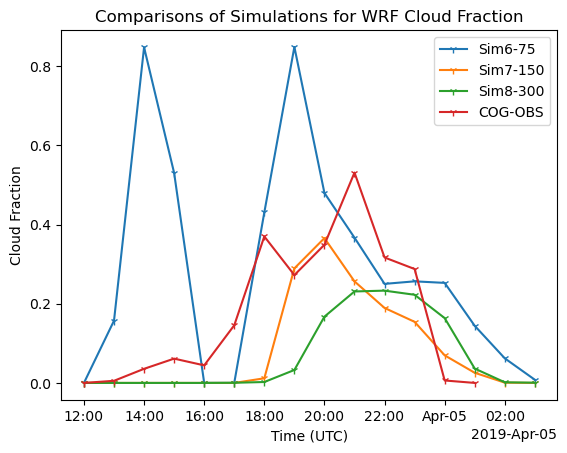

In [5]:
# Plot cloud core fractions

fig, ax = plt.subplots(ncols=1)

# source_type = 1 is simulations
# source_type = 0 is observations

ds_cogs6["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="1", label="Sim6-75")
ds_cogs7["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="1", label="Sim7-150")
ds_cogs8["low_cloud_fraction_cogs"].isel(source_type=1).plot(ax=ax, marker="1", label="Sim8-300")
# Observations
ds_cogs7["low_cloud_fraction_cogs"].isel(source_type=0).plot(ax=ax, marker="1", label="COG-OBS")

ax.legend()
ax.set_title("Comparisons of Simulations for WRF Cloud Fraction")
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Cloud Fraction")

plt.show()


# Cloud Core Fraction Profiles

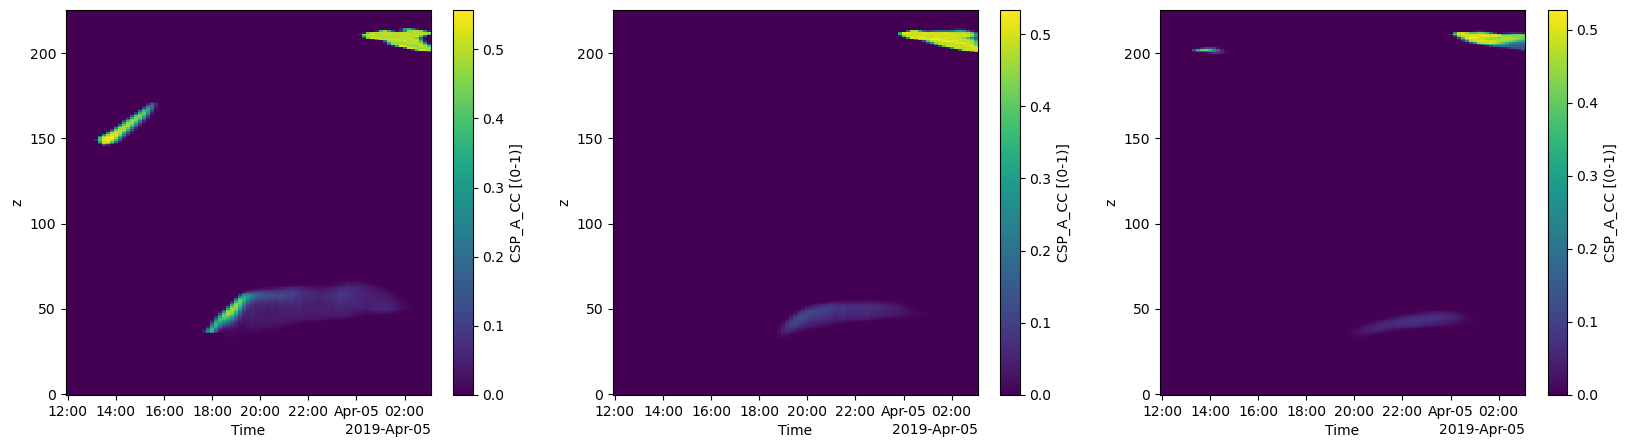

In [6]:
# Fraction of cloud core grid points

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ds_stat6["CSP_A_CC"].plot(ax=ax[0], y ="z") #one plot
ds_stat7["CSP_A_CC"].plot(ax=ax[1], y = "z")
ds_stat8["CSP_A_CC"].plot(ax=ax[2], y = "z")

plt.show()

# simulation 6, 7, and 8 from the left to the right.

## Based on the above figures, We can see that Simulation 6 produces more cloud core fractions, and Simulation 7 is the closest one to the observation. What we learned today. 

## Based on them, I assume the different large-scale forcing lengths impact turbulence and thus cloud core fraction.

## I know you all know this, but just to recap, TKE is the turbulent kinematic energy and thus it is the energy for turbulence from the surface to the atmospheric boundary layer. TKE = (U^2 + V^2 + W^2)/2


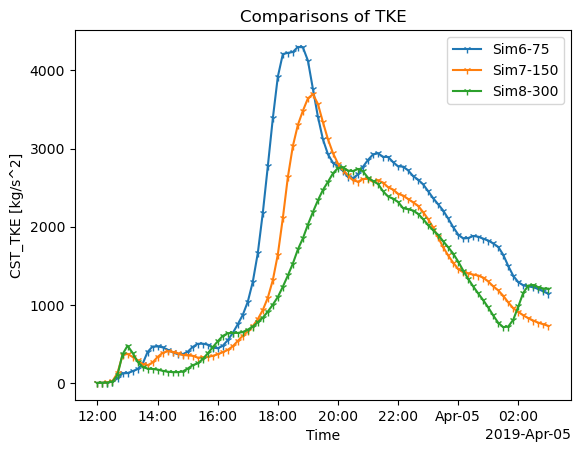

In [7]:
# Compare TKE with three simulations
fig, ax = plt.subplots(ncols=1)

ds_stat6["CST_TKE"].plot(ax=ax, marker="1", label="Sim6-75")
ds_stat7["CST_TKE"].plot(ax=ax, marker="1", label="Sim7-150")
ds_stat8["CST_TKE"].plot(ax=ax, marker="1", label="Sim8-300")

ax.legend()
ax.set_title("Comparisons of TKE")

plt.show()

# We can see that simulation 6 has the biggest TKE value and it reaches its peak at the earliest time (around 18:00 UTC) among the three simulations.


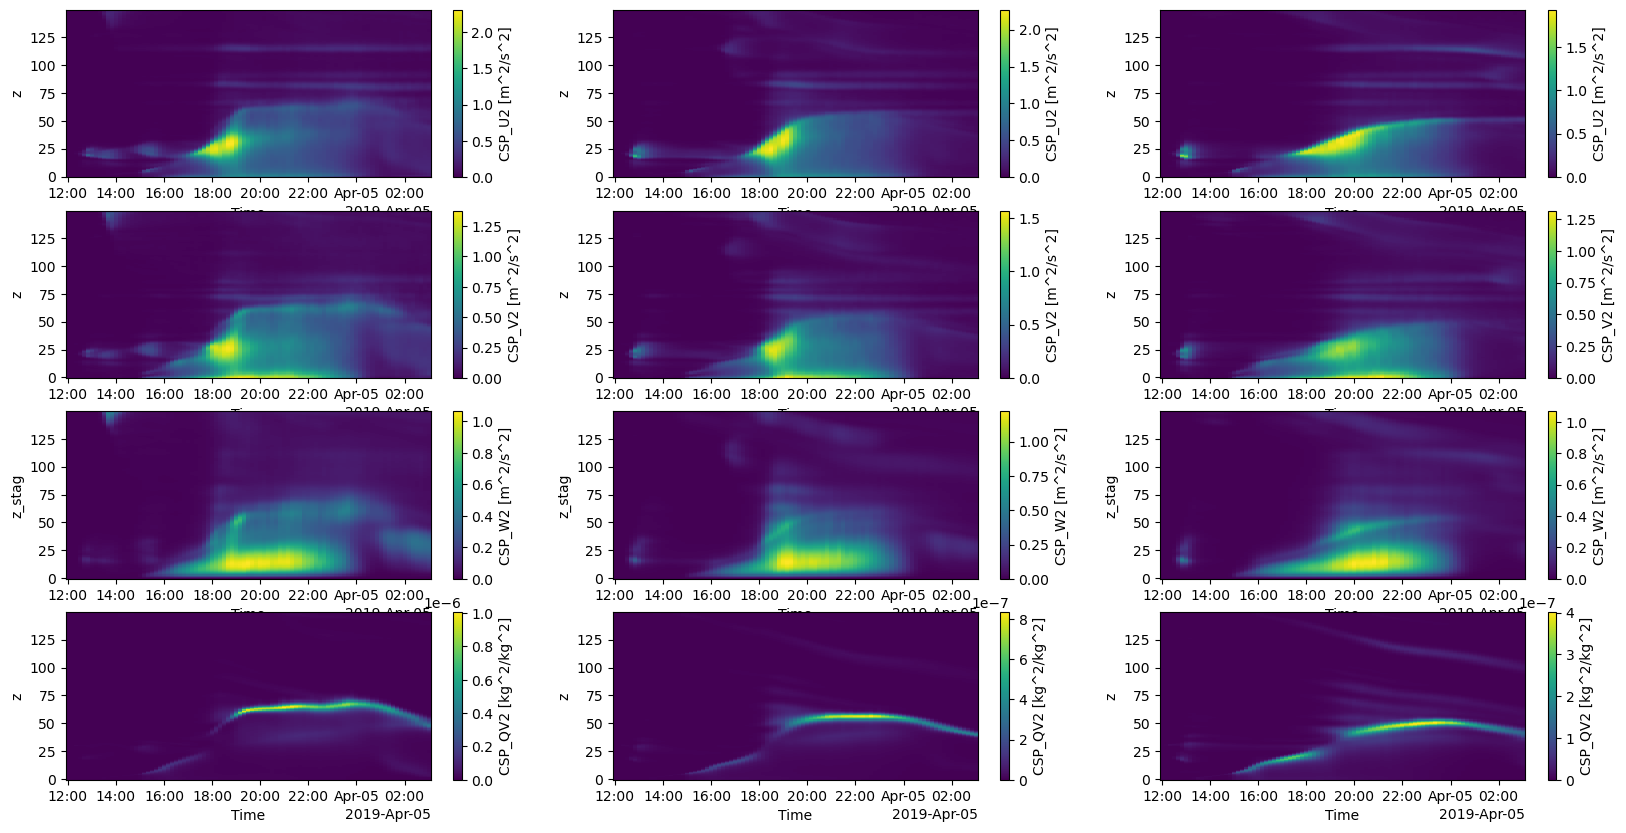

In [10]:

# To further investigate the impact of large-scale forcing scales,
# I looked at each component of TKE and specific humidity (water vapor mixing ratio) variance


fig, ax = plt.subplots(4, 3, figsize=(20, 10))

ds_stat6["CSP_U2"].isel(z= slice(0, 150)).plot(ax=ax[0,0], y ="z") #one plot
ds_stat7["CSP_U2"].isel(z= slice(0, 150)).plot(ax=ax[0,1], y = "z")
ds_stat8["CSP_U2"].isel(z= slice(0, 150)).plot(ax=ax[0,2], y = "z")

ds_stat6["CSP_V2"].isel(z= slice(0, 150)).plot(ax=ax[1,0], y ="z") #one plot
ds_stat7["CSP_V2"].isel(z= slice(0, 150)).plot(ax=ax[1,1], y = "z")
ds_stat8["CSP_V2"].isel(z= slice(0, 150)).plot(ax=ax[1,2], y = "z")

ds_stat6["CSP_W2"].isel(z_stag= slice(0, 150)).plot(ax=ax[2,0], y ="z_stag") #one plot
ds_stat7["CSP_W2"].isel(z_stag= slice(0, 150)).plot(ax=ax[2,1], y = "z_stag")
ds_stat8["CSP_W2"].isel(z_stag= slice(0, 150)).plot(ax=ax[2,2], y = "z_stag")

ds_stat6["CSP_QV2"].isel(z= slice(0, 150)).plot(ax=ax[3,0], y ="z") #one plot
ds_stat7["CSP_QV2"].isel(z= slice(0, 150)).plot(ax=ax[3,1], y = "z")
ds_stat8["CSP_QV2"].isel(z= slice(0, 150)).plot(ax=ax[3,2], y = "z")


plt.show()

# U wind variance, V wind variance, W wind variance, the total water vapor mixing ratio from top to bottom.
# Simulation 6, 7, and 8 from the left to the right.

# If you find something from the below figure, please let me know!
# lim
# What I can see is the variances rapidly increase in Simulation 6. 
# I guess that is the atmospheric boundary layer (ABL) growth. 
# That is, the ABL grows at the fastest rate in the smallest Large Scale Forcing Scale. 

# However, the water vapor mixing ratio (the bottom row) is the lowest in Simulation 6. 
# Is it because the strong turbulence in Simulation 6 makes a well-mixed layer??
# If you can interpret this, please let me know.


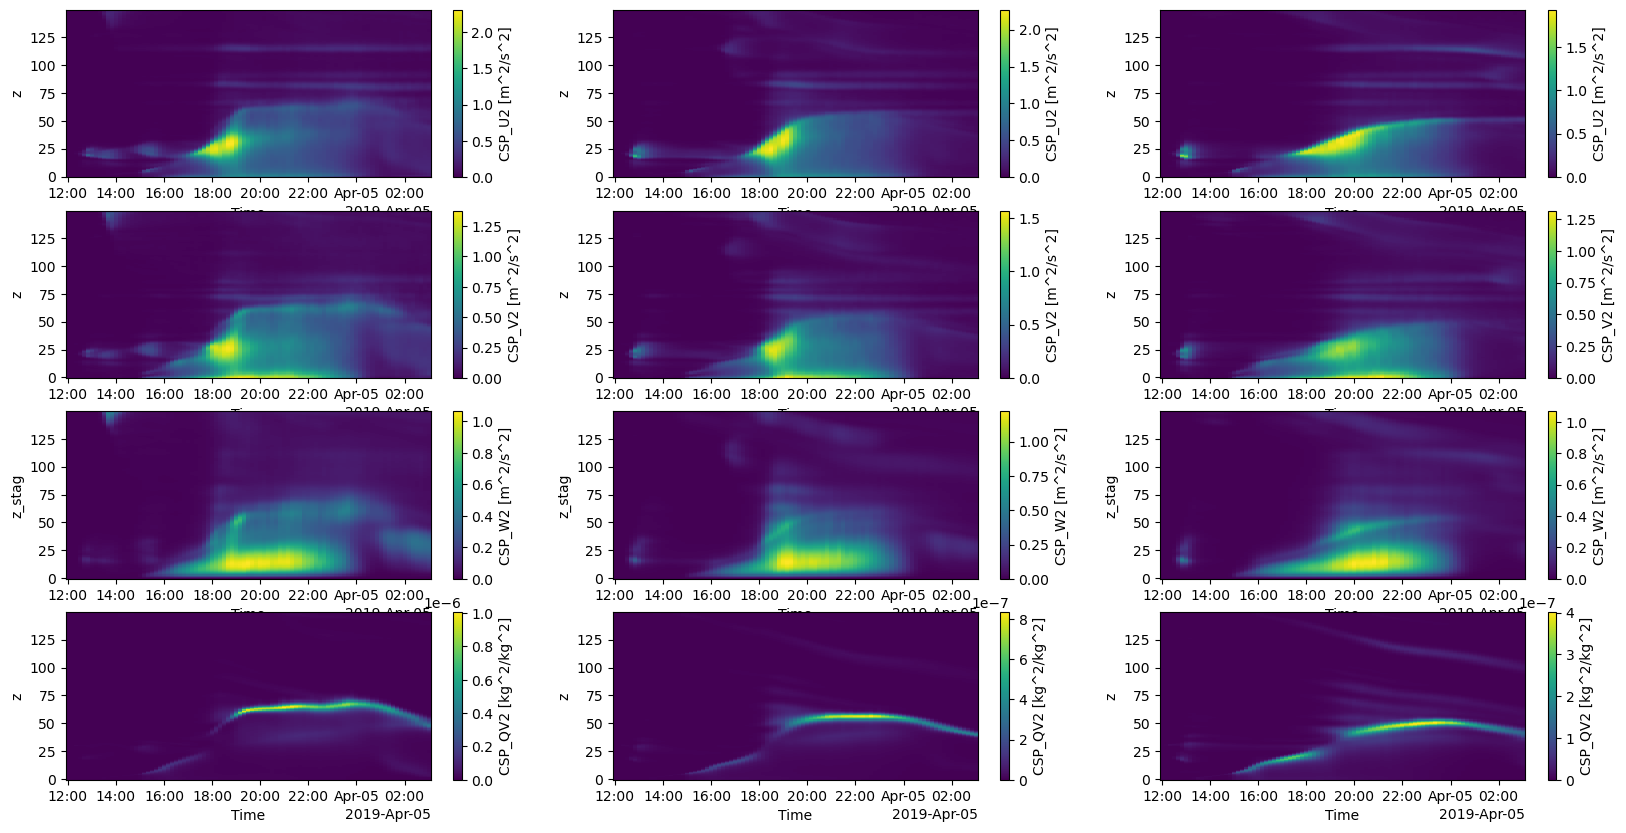

In [9]:
fig = plt.figure(figsize=(20, 10))

# Create a plot for temperature
ax = fig.add_subplot(4, 3, 1)

ds_stat6["CSP_U2"].isel(z= slice(0, 150)).plot( y ="z") #one plot

#ax.set_title('Temperature')
#ax.set_xlim(110, 130)
#ax.set_ylim(290, 315)

# Create a plot for dewpoint
ax2 = fig.add_subplot(4, 3, 2)
ds_stat7["CSP_U2"].isel(z= slice(0, 150)).plot( y = "z")

ax3 = fig.add_subplot(4, 3, 3)
ds_stat8["CSP_U2"].isel(z= slice(0, 150)).plot( y = "z")

ax4 = fig.add_subplot(4, 3, 4)
ds_stat6["CSP_V2"].isel(z= slice(0, 150)).plot( y ="z") #one plot

ax5 = fig.add_subplot(4, 3, 5)
ds_stat7["CSP_V2"].isel(z= slice(0, 150)).plot( y = "z")

ax6 = fig.add_subplot(4, 3, 6)
ds_stat8["CSP_V2"].isel(z= slice(0, 150)).plot( y = "z")

ax7 = fig.add_subplot(4, 3, 7)
ds_stat6["CSP_W2"].isel(z_stag= slice(0, 150)).plot( y ="z_stag") #one plot

ax8 = fig.add_subplot(4, 3, 8)
ds_stat7["CSP_W2"].isel(z_stag= slice(0, 150)).plot( y = "z_stag")

ax9 = fig.add_subplot(4, 3, 9)
ds_stat8["CSP_W2"].isel(z_stag= slice(0, 150)).plot( y = "z_stag")

ax10 = fig.add_subplot(4, 3, 10)
ds_stat6["CSP_QV2"].isel(z= slice(0, 150)).plot( y ="z") #one plot
#ax10.set_ylim(0, 4)

ax11 = fig.add_subplot(4, 3, 11)
ds_stat7["CSP_QV2"].isel(z= slice(0, 150)).plot( y = "z")
#ax11.set_ylim(0, 4)

ax12 = fig.add_subplot(4, 3, 12)
ds_stat8["CSP_QV2"].isel(z= slice(0, 150)).plot( y = "z")
#ax12.set_ylim(0, 4)


# Conclusion
The large-scale forcing scales impact cloud core fraction due to different TKEs.
As Girish suggests today (our assumption), the model should carefully choose the large-forcing length scale to represent the environment appropriately on a given day.
